# fly_data object : defined in working_functions.py

Things to implement in it :
    -more metadata ?

method the object should have :
    -output the object seen by the fly at a given time based on all the other fly object in the "session" (or just given a number of fly objects)

In [1]:
    ### Necessary modules

#for plots
import matplotlib.pyplot as plt


# trajectorytools needs to be installed. To installed follow the instructions 
# at http://www.github.com/fjhheras/trajectorytools
from trajectorytools.constants import dir_of_data
import trajectorytools as tt
import trajectorytools.plot as ttplot
import trajectorytools.socialcontext as ttsocial

#My functions
from working_functions import *

#For importing files and timing cells.
import pickle as pkl
import time

Analysis function based on numerous fly_data objects from a single video :

    -position_summary: summarizes where we can find other flies relatively to our focus fly

    -A focus fly should be defined
    -Relative_fly object should be calculates based on the focus fly
    -What to calculate of this ?
    -Correlation between "turning" of the fly (derivation of orientation) and position of other flies ("global" position and specific position of every fly)

Landscape function ?:
    -Given a focus fly and a set of object, single-object projection of everything the fly sees ? 

In [ ]:
def position_summary(focus_fly, flystack):
    relflystack = list()
    for fly in flystack:
        relflystack.append(relative_fly(focus_fly, fly))
    
        
    
    

Cell below doesn't need to be executed, is just here to write down data so it's possible to pick it up quickly afterward (get_ori takes ~2min to run)

In [9]:
st = time.time()
Dir = "/home/maubry/python/idtrackerai"
video = "fly2.avi"
traj= "fly2_trajectories_wo_gaps.npy"
flystack = get_ori(Dir, video, traj)
print('time elapsed : {}'.format(time.time()-st))

f = open("ori_data.pkl", "wb")
pkl.dump(flystack, f)

/home/maubry/python/idtrackerai/working_functions.py:275: RuntimeWarning: divide by zero encountered in true_divide
  angle = np.degrees(np.arctan(np.absolute(y)/np.absolute(x)))
/home/maubry/python/idtrackerai/working_functions.py:275: RuntimeWarning: invalid value encountered in true_divide
  angle = np.degrees(np.arctan(np.absolute(y)/np.absolute(x)))


time elapsed ; 131.6126847267151


orientations have been corrected and flipped +90 degrees
Correlation is  0.26834165642076374
Orientations have been corrected and flipped 180 degrees.
Correlation is  0.12537950900010575
[ True  True  True ... False False False]


/home/maubry/python/idtrackerai/working_functions.py:88: RuntimeWarning: invalid value encountered in less
  angle[angle < 0] += 360
/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal


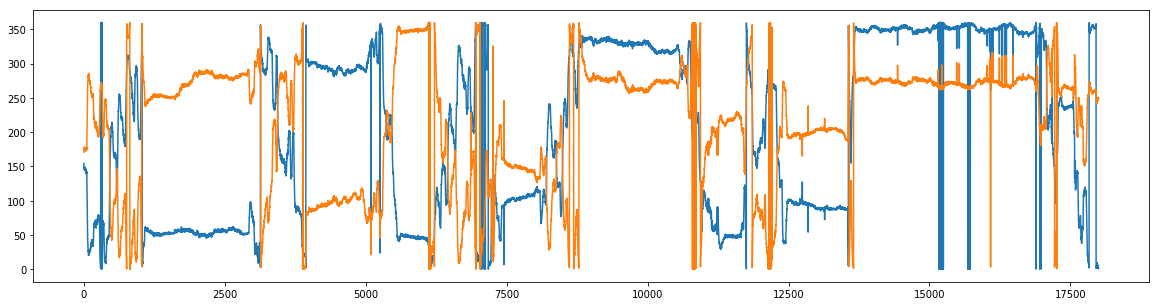

In [2]:
f = open("ori_data.pkl", "rb")
random_stack = pkl.load(f)
fly = random_stack[1]
fly_correc = copy.deepcopy(fly)
fly_correc.ori_correc(overwrite=True)

fly2 = random_stack[4]
fly2_correc = copy.deepcopy(fly2)
fly2_correc.ori_correc(overwrite=True)
# #Get first fly and correct its orientations

rel = relative_fly(fly_correc, fly2_correc)
showrange = range(10000)

plt.figure(figsize=(20,5))
plt.plot(fly_correc.orientations)
plt.plot(rel.angle)
print(rel.angle <= 220)

In [88]:
file_path = '/home/maubry/python/idtrackerai/fly2_trajectories_wo_gaps.npy'
    
trajectories_dict = np.load(file_path, encoding='latin1').item()
trajectories_dict.keys()
trajectories_dict['id_probabilities']

array([[[ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.]],

       [[ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.]],

       [[ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.]],

       ...,

       [[ 1.],
        [ 1.],
        [ 1.],
        [nan],
        [ 0.]],

       [[ 1.],
        [ 1.],
        [ 1.],
        [nan],
        [ 0.]],

       [[ 1.],
        [ 1.],
        [ 1.],
        [nan],
        [ 0.]]])